In [1]:
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import gaussian_kde

# **Messier 7**

In [2]:
querym7 = '''
SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 267.86 and 269.063
AND dec between -35.39 and -34.19
AND abs(pmra_error/pmra)<0.10 
AND abs(pmdec_error/pmdec)<0.10
and parallax_over_error > 10 
order by parallax desc'''
jobm7 = Gaia.launch_job_async(querym7)
rm7 = jobm7.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


Text(0, 0.5, 'Apparent Magnitude in G passband')

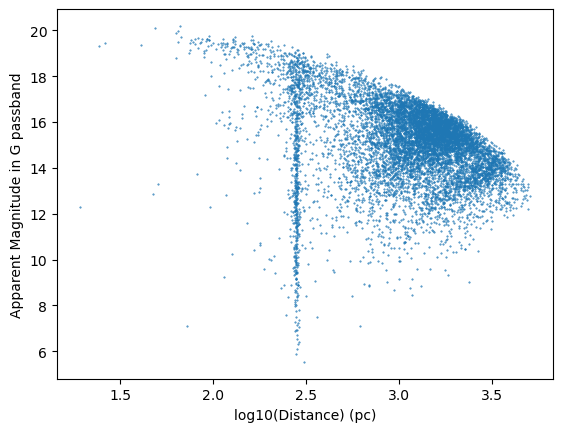

In [3]:
distm7 = 1000/rm7['parallax']
plt.scatter(np.log10(distm7),rm7['phot_g_mean_mag'], s=0.2)
plt.xlabel('log10(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')

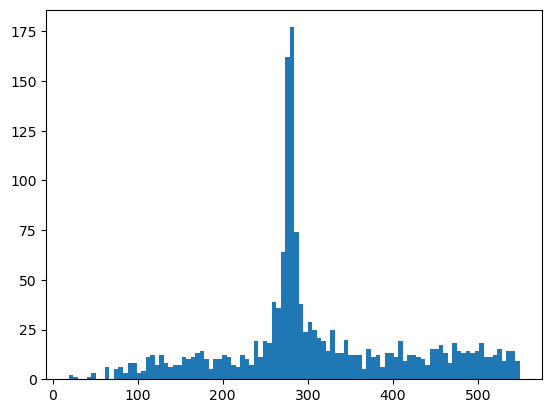

In [4]:
# CODE FOR DISTANCE CUTS
distm7 = distm7[distm7<550]
# CODE FOR HISTOGRAM
plt.hist((distm7), bins=100)
plt.show()

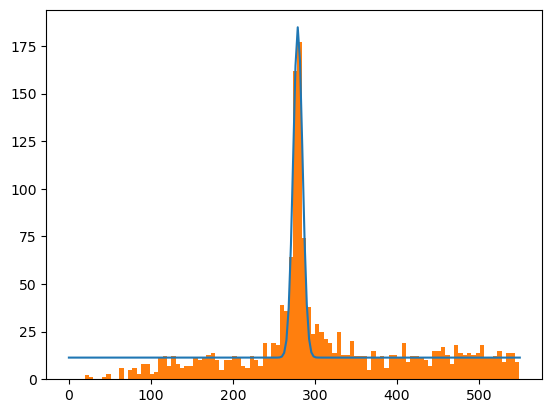

In [5]:
def f(x, A, m, s, c):
    return A*np.exp(-(x-m)**2/(2*s**2)) + c

#TO GET VALUES OF X AND Y FROM HISTOGRAM - LOOK UP NUMPY.HISTOGRAM SYNTAX
nm7, binsm7 = np.histogram(distm7, bins=100)
binsm7 = [0.5*(binsm7[i]+binsm7[i+1]) for i in range(len(binsm7)-1)]
#CODE FOR GAUSSIAN FITTING
p0 = [10, 250, 100, 100]
poptm7, pcovm7 = curve_fit(f, binsm7, nm7, p0)
xm7 = np.linspace(0,550,200)
plt.plot(xm7, f(xm7, *poptm7))
plt.hist(distm7, bins=100)
plt.show()

In [6]:
#cuts to be applied to parallax
print(1000/np.min([distm7[distm7>(poptm7[1]-poptm7[2])]]), 1000/np.max([distm7[distm7<(poptm7[1]+poptm7[2])]]))

3.507612770398551 3.6563135436913794


In [7]:
querym7_2 = '''
SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 267.86 and 269.063
AND dec between -35.39 and -34.19
AND abs(pmra_error/pmra)<0.10 
AND abs(pmdec_error/pmdec)<0.10
and parallax between 3.5 and 3.6568'''
jobm7_2 = Gaia.launch_job_async(querym7_2)
rm7_2 = jobm7_2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


Text(0, 0.5, 'Apparent Magnitude in G passband')

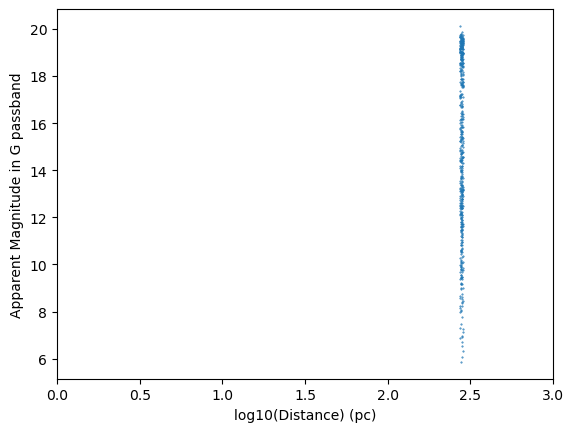

In [8]:
plt.scatter(np.log10(1000/rm7_2['parallax']),rm7_2['phot_g_mean_mag'], s=0.2)
plt.xlim(0,3)
plt.xlabel('log10(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')

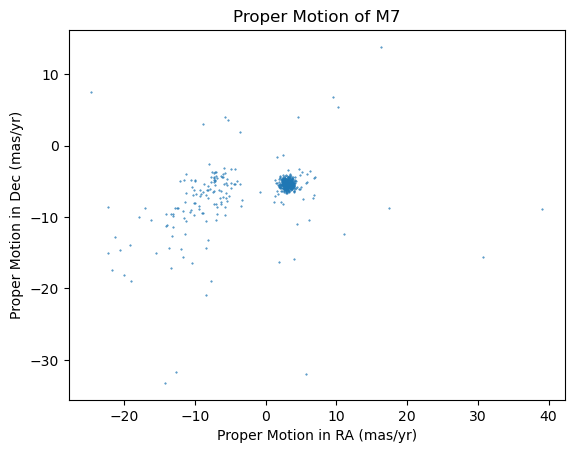

In [9]:
plt.scatter(rm7_2['pmra'],rm7_2['pmdec'], s=0.2)
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Proper Motion in Dec (mas/yr)')
plt.title('Proper Motion of M7')
plt.show()

# **Messier 6**

In [10]:
querym6 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 264.425 and 265.625
AND dec between -32.81 and -31.61
AND abs(pmra_error/pmra)<0.10 
AND abs(pmdec_error/pmdec)<0.10
and parallax_over_error > 10 
order by parallax desc'''
jobm6 = Gaia.launch_job_async(querym6)
rm6 = jobm6.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


Text(0, 0.5, 'Apparent Magnitude in G passband')

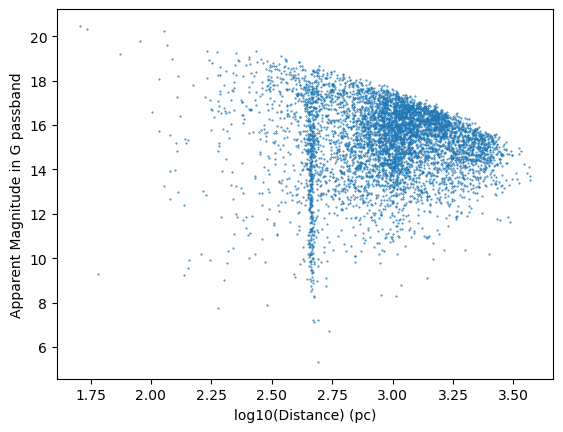

In [11]:
distm6 = 1000/rm6['parallax']
plt.scatter(np.log10(distm6),rm6['phot_g_mean_mag'], s=0.2)
plt.xlabel('log10(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')

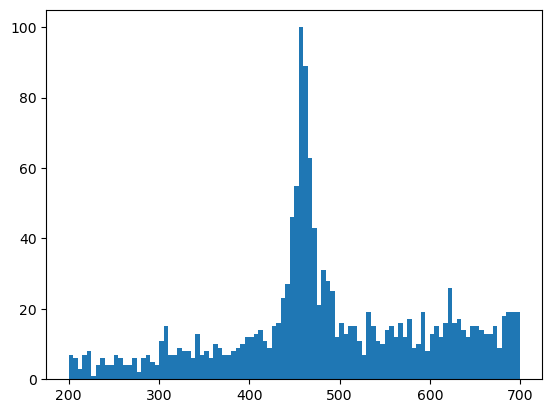

In [12]:
# CODE FOR DISTANCE CUTS
distm6 = distm6[distm6<700]
distm6 = distm6[distm6>200]
# CODE FOR HISTOGRAM
plt.hist((distm6), bins=100)
plt.show()

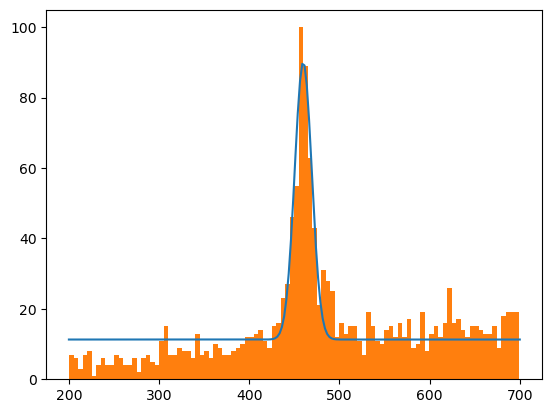

In [13]:
def f(x, A, m, s, c):
    return A*np.exp(-(x-m)**2/(2*s**2)) + c

#TO GET VALUES OF X AND Y FROM HISTOGRAM - LOOK UP NUMPY.HISTOGRAM SYNTAX
nm6, binsm6 = np.histogram(distm6, bins=100)
binsm6 = [0.5*(binsm6[i]+binsm6[i+1]) for i in range(len(binsm6)-1)]
#CODE FOR GAUSSIAN FITTING
p0m7 = [10, 450, 100, 100]
poptm6, pcovm6 = curve_fit(f, binsm6, nm6, p0m7)
xm6 = np.linspace(200,700,200)
plt.plot(xm6, f(xm6, *poptm6))
plt.hist(distm6, bins=100)
plt.show()

In [14]:
#cuts to be applied to parallax
print(1000/np.min([distm6[distm6>(poptm6[1]-poptm6[2])]]), 1000/np.max([distm6[distm6<(poptm6[1]+poptm6[2])]]))

2.129634835758908 2.2205744865567727


In [15]:
querym6_2 = '''
SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 264.425 and 265.625
AND dec between -32.81 and -31.61
AND abs(pmra_error/pmra)<0.10 
AND abs(pmdec_error/pmdec)<0.10
and parallax between 2.13 and 2.22'''
jobm6_2 = Gaia.launch_job_async(querym6_2)
rm6_2 = jobm6_2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


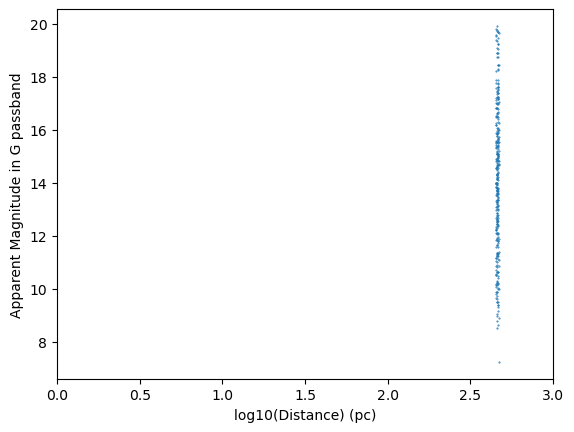

In [16]:
plt.scatter(np.log10(1000/rm6_2['parallax']),rm6_2['phot_g_mean_mag'], s=0.2)
plt.xlim(0,3)
plt.xlabel('log10(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')
plt.show()

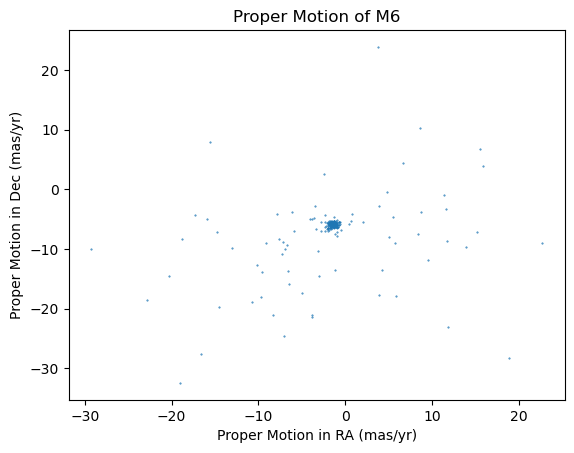

In [17]:
plt.scatter(rm6_2['pmra'],rm6_2['pmdec'], s=0.2)
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Proper Motion in Dec (mas/yr)')
plt.title('Proper Motion of M6')
plt.show()

# **Messier 36**

In [18]:
querym38 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 105.2 and 106.39
AND dec between -8.93 and -7.73
AND abs(pmra_error/pmra)<0.10 
AND abs(pmdec_error/pmdec)<0.10
and parallax_over_error > 10 
order by parallax desc'''
jobm38 = Gaia.launch_job_async(querym38)
rm38 = jobm38.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


Text(0.5, 0, 'log10(Distance) (pc)')

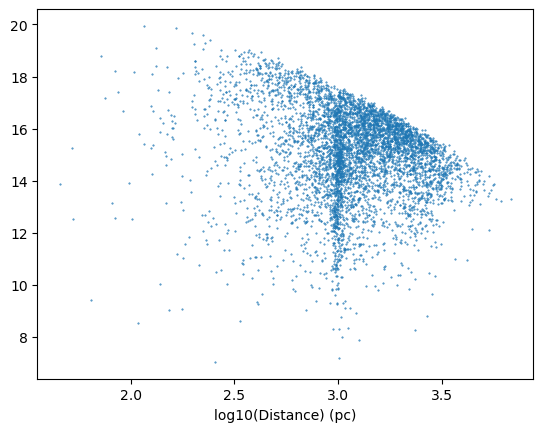

In [19]:
distm38 = 1000/rm38['parallax']
plt.scatter(np.log10(distm38),rm38['phot_g_mean_mag'], s=0.2)
plt.xlabel('log10(Distance) (pc)')

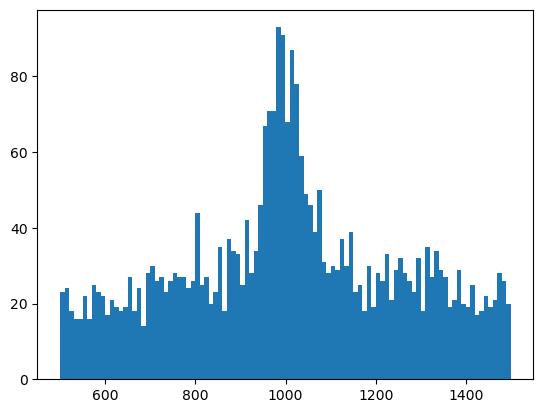

In [20]:
# CODE FOR DISTANCE CUTS
distm38 = distm38[distm38<1500]
distm38 = distm38[distm38>500]
# CODE FOR HISTOGRAM
plt.hist((distm38), bins=100)
plt.show()

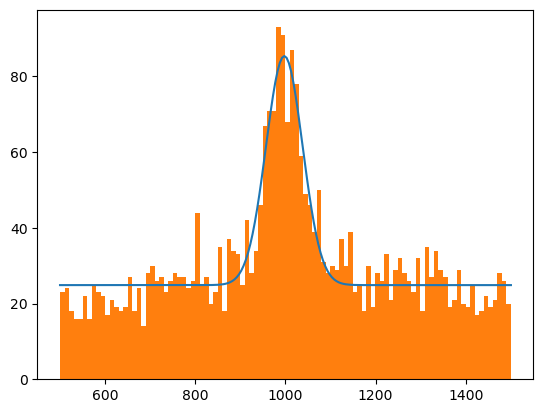

In [21]:
def f(x, A, m, s, c):
    return A*np.exp(-(x-m)**2/(2*s**2)) + c

#TO GET VALUES OF X AND Y FROM HISTOGRAM - LOOK UP NUMPY.HISTOGRAM SYNTAX
nm38, binsm38 = np.histogram(distm38, bins=100)

binsm38 = [0.5*(binsm38[i]+binsm38[i+1]) for i in range(len(binsm38)-1)]
#CODE FOR GAUSSIAN FITTING
p0m38 = [10, 1000, 100, 100]

poptm38, pcovm38 = curve_fit(f, binsm38, nm38, p0m38)
xm38 = np.linspace(500,1500,200)
plt.plot(xm38, f(xm38, *poptm38))

plt.hist(distm38, bins=100)
plt.show()

In [22]:
#cuts to be applied to parallax

print(1000/np.min([distm38[distm38>(poptm38[1]-poptm38[2])]]), 1000/np.max([distm38[distm38<(poptm38[1]+poptm38[2])]]))

0.9631824503988602 1.0451639801434636


In [23]:
querym38_2 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 105.2 and 106.39
AND dec between -8.93 and -7.73
AND abs(pmra_error/pmra)<0.10 
AND abs(pmdec_error/pmdec)<0.10
and parallax between 0.96 and 1.04
and parallax_over_error > 10 '''

jobm38_2 = Gaia.launch_job_async(querym38_2)
rm38_2 = jobm38_2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


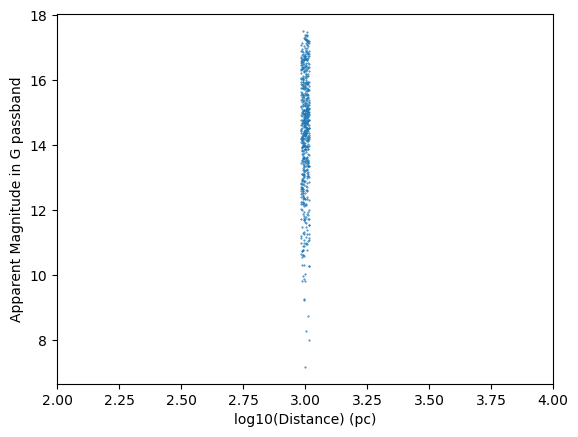

In [24]:
plt.scatter(np.log10(1000/rm38_2['parallax']),rm38_2['phot_g_mean_mag'], s=0.2)
plt.xlim(2,4)
plt.xlabel('log10(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')
plt.show()

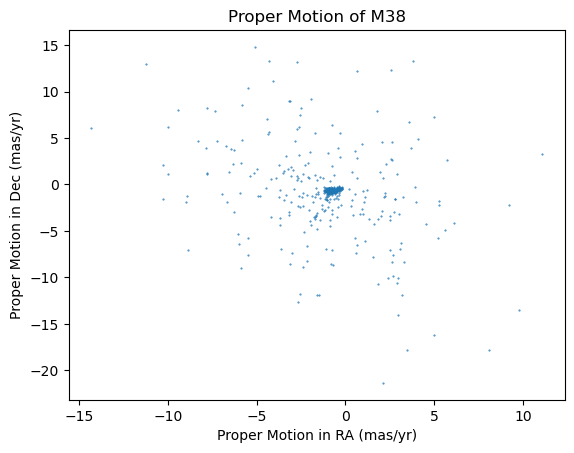

In [25]:
plt.scatter(rm38_2['pmra'],rm38_2['pmdec'], s=0.2)
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Proper Motion in Dec (mas/yr)')
plt.title('Proper Motion of M38')  
plt.show()

# **HR Diagram**

## **M67**

In [26]:
querym67 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 132.3 and 133.3
AND dec between 11.3 and 12.3
AND abs(pmra_error/pmra)<0.10 
AND abs(pmdec_error/pmdec)<0.10
and parallax between 1.12 and 1.19 
order by parallax desc'''
#parallax cuts found using same method as done for M6
jobm67 = Gaia.launch_job_async(querym67)
rm67 = jobm67.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


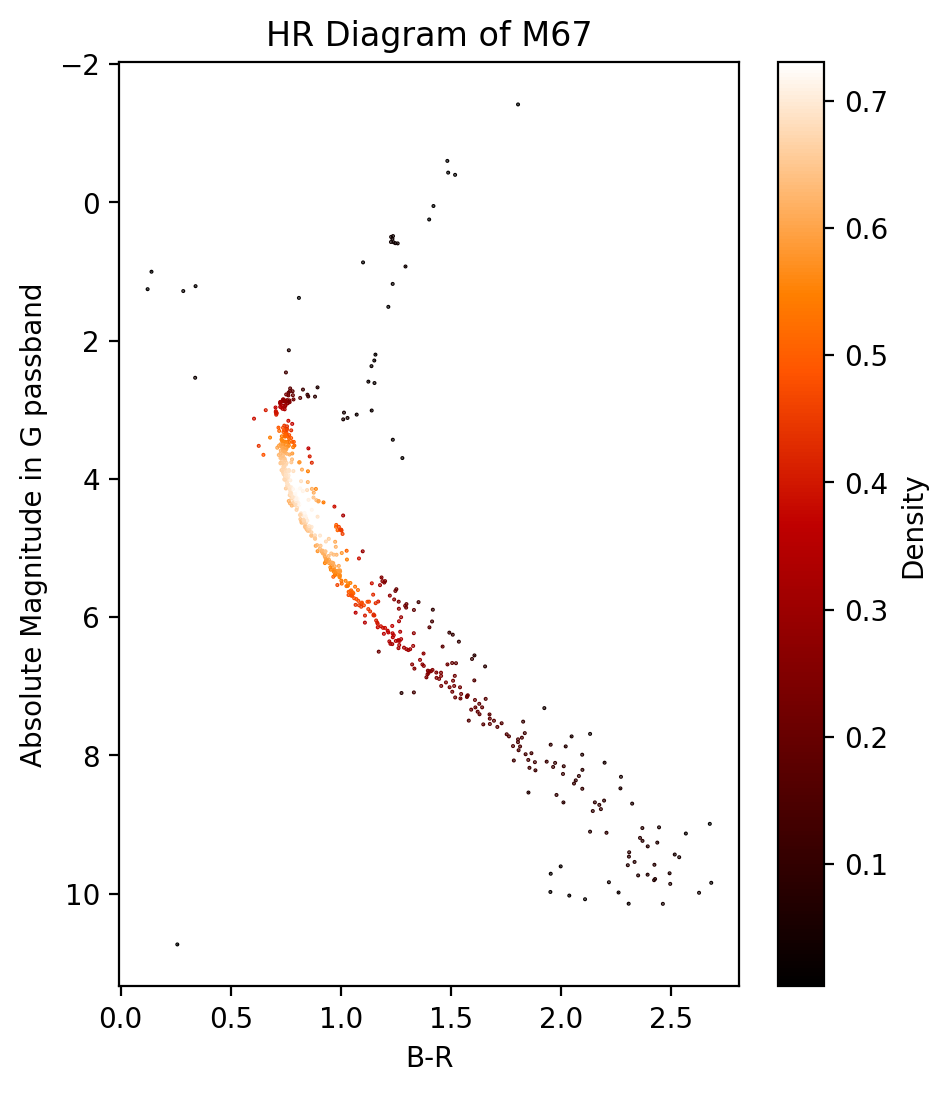

In [27]:
distm67 = 1000/rm67['parallax']
M67 = rm67['phot_g_mean_mag'] - 5*np.log10(distm67) + 5
bprp67 = rm67['phot_bp_mean_mag'] - rm67['phot_rp_mean_mag']
M67=np.array([M67[x] for x in range(len(M67)) if bprp67[x]!=np.nan])
bprp67 = np.array([x for x in bprp67 if x!=np.nan])
m6bprp67 = np.vstack((bprp67, M67))
zm67 = gaussian_kde(m6bprp67)(m6bprp67)
plt.figure(figsize=(5,6), dpi=200)
plt.title('HR Diagram of M67')
plt.xlabel('B-R')
plt.ylabel('Absolute Magnitude in G passband')
plt.scatter(bprp67, M67, s=0.2, c=zm67, cmap='gist_heat')
plt.colorbar(label='Density')
plt.gca().invert_yaxis()
plt.show()

## **M7**

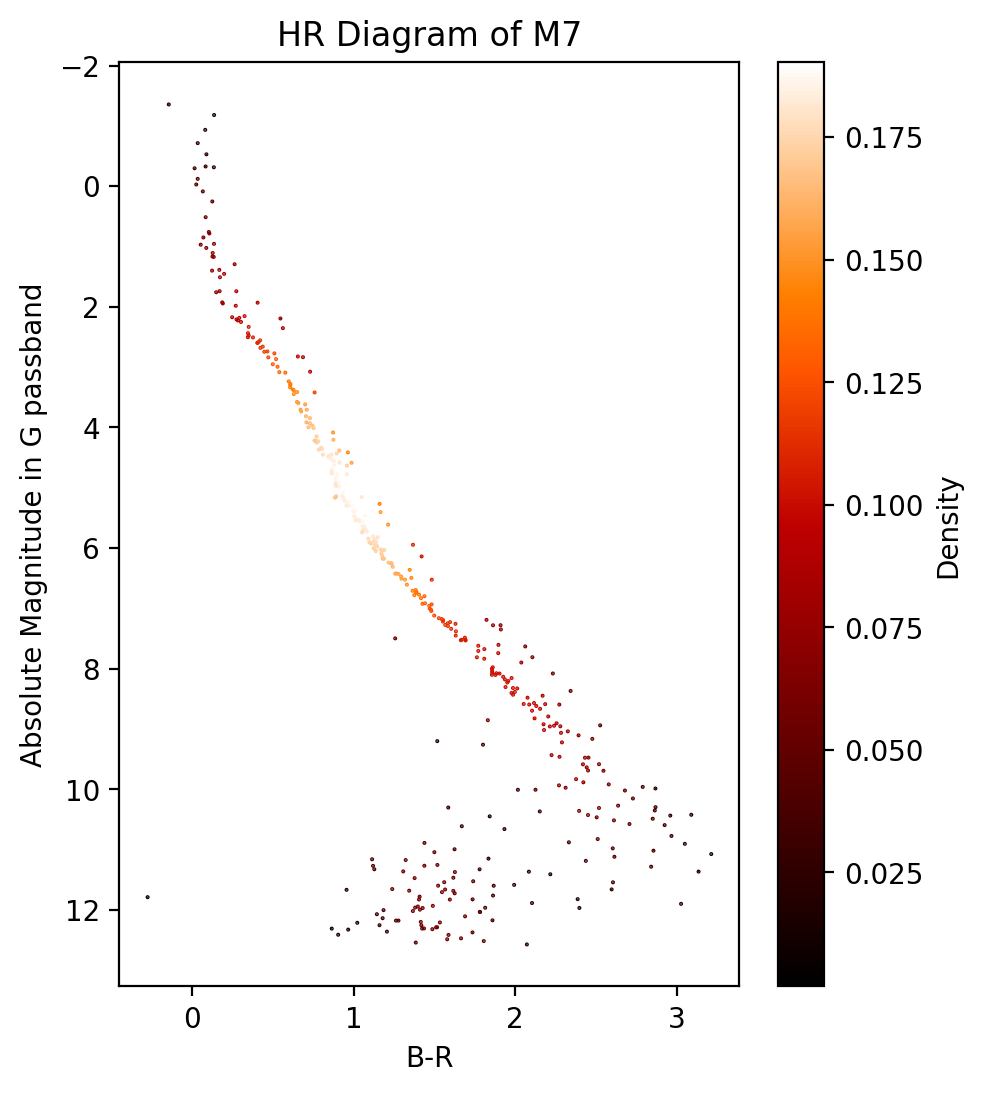

In [28]:
distm7_2 = 1000/rm7_2['parallax']
M7 = rm7_2['phot_g_mean_mag'] - 5*np.log10(distm7_2) + 5
bprp7 = rm7_2['phot_bp_mean_mag'] - rm7_2['phot_rp_mean_mag']
M7=np.array([M7[x] for x in range(len(M7)) if bprp7[x]!=np.nan])
bprp7 = np.array([x for x in bprp7 if x!=np.nan])
plt.figure(figsize=(5,6), dpi=200)
plt.title('HR Diagram of M7')
plt.xlabel('B-R')
plt.ylabel('Absolute Magnitude in G passband')
m6bprp7 = np.vstack((bprp7, M7))
zm7 = gaussian_kde(m6bprp7)(m6bprp7)
plt.scatter(bprp7, M7, s=0.2, c=zm7, cmap='gist_heat')
plt.colorbar(label='Density')
plt.gca().invert_yaxis()
plt.show()

## **M6**

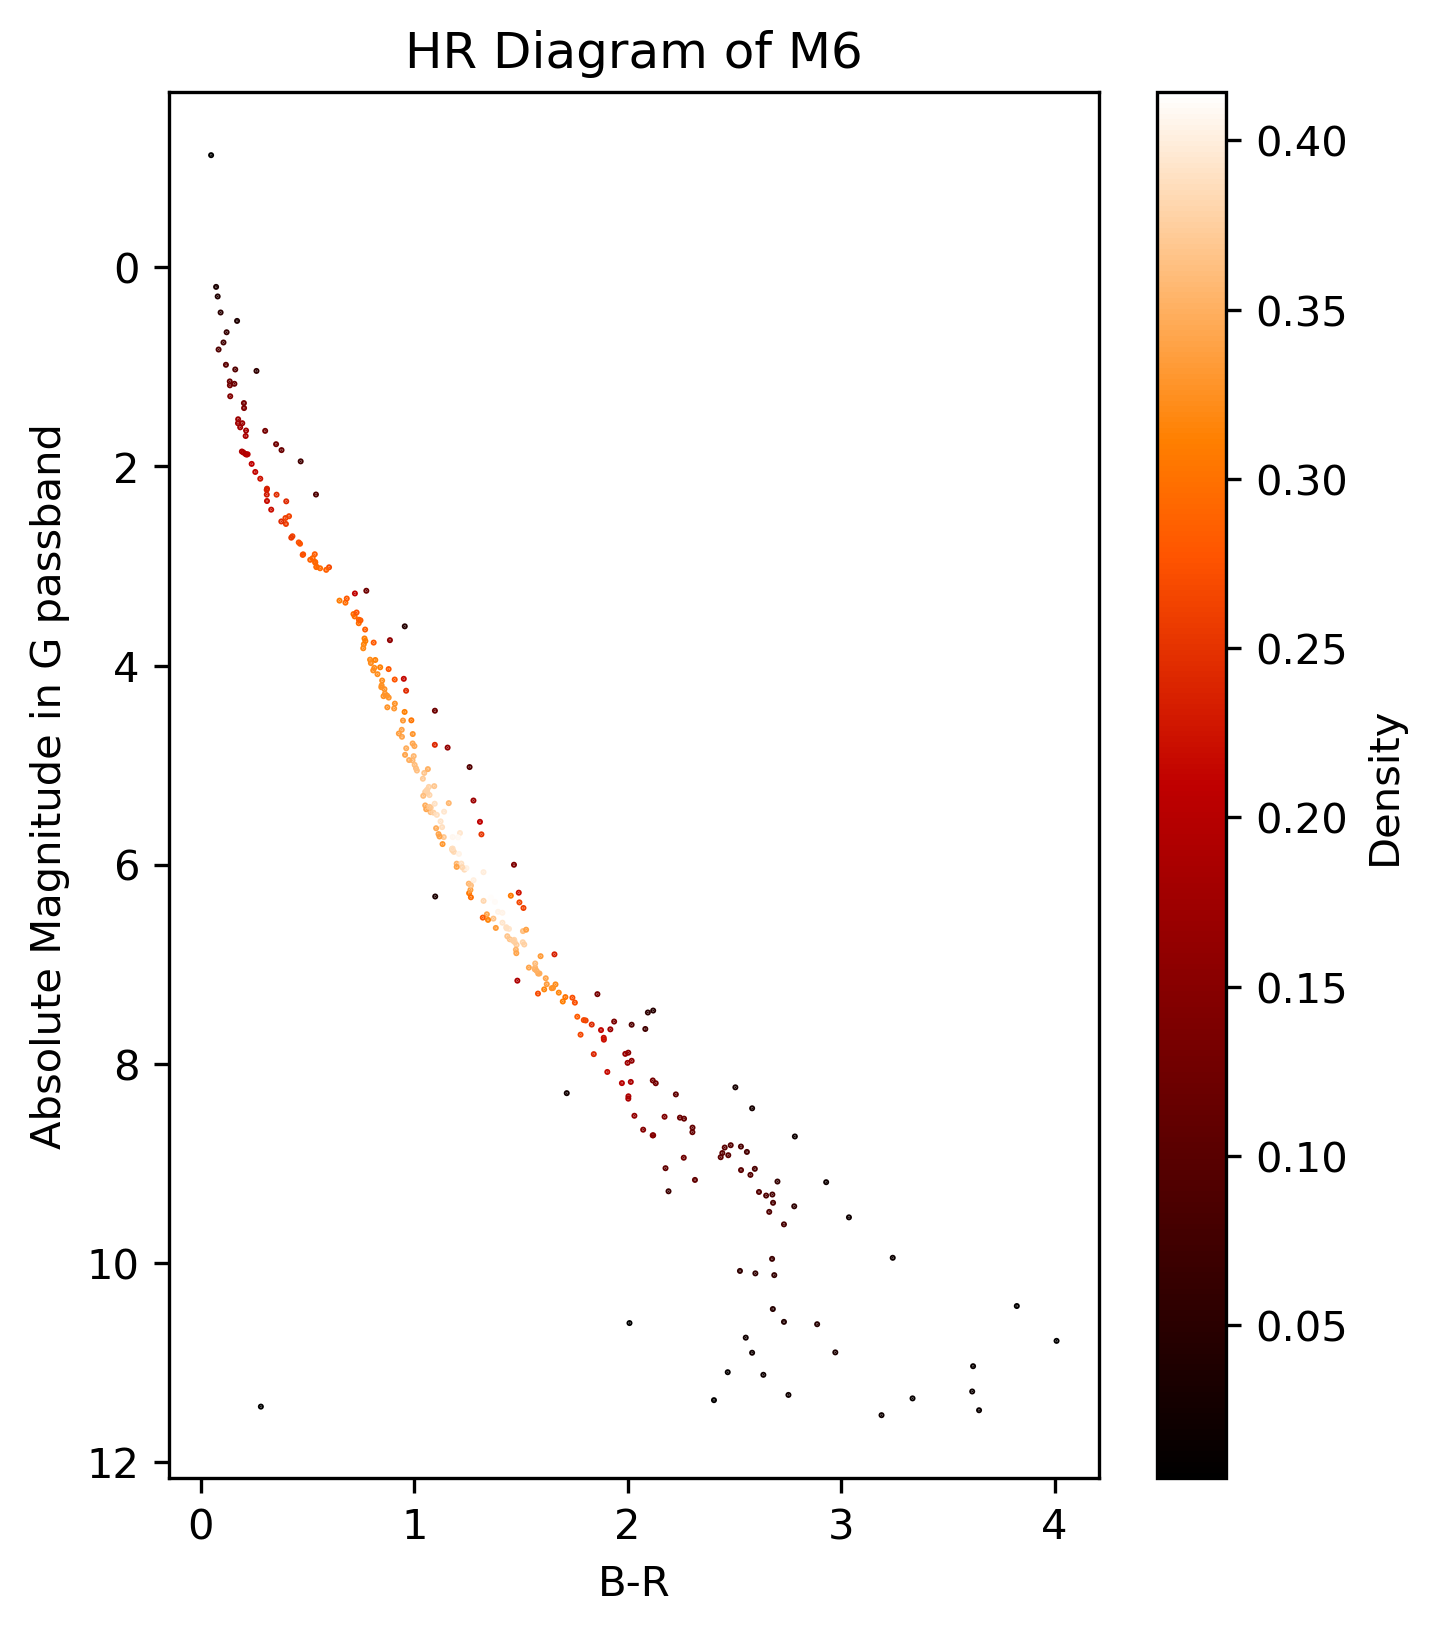

In [29]:
distm6_2 = 1000/rm6_2['parallax']
M6 = rm6_2['phot_g_mean_mag'] - 5*np.log10(distm6_2) + 5
bprp6 = rm6_2['phot_bp_mean_mag'] - rm6_2['phot_rp_mean_mag']
M6=np.array([M6[x] for x in range(len(M6)) if bprp6[x]!=np.nan])
bprp6 = np.array([x for x in bprp6 if x!=np.nan])
m6bprp6 = np.vstack((bprp6, M6))
zm6 = gaussian_kde(m6bprp6)(m6bprp6)
plt.figure(figsize=(5,6), dpi=300)
plt.title('HR Diagram of M6')
plt.xlabel('B-R')
plt.ylabel('Absolute Magnitude in G passband')
plt.scatter(bprp6, M6, s=0.2, c=zm6, cmap='gist_heat')
plt.colorbar(label='Density')
plt.gca().invert_yaxis()
plt.show()

## **M36**

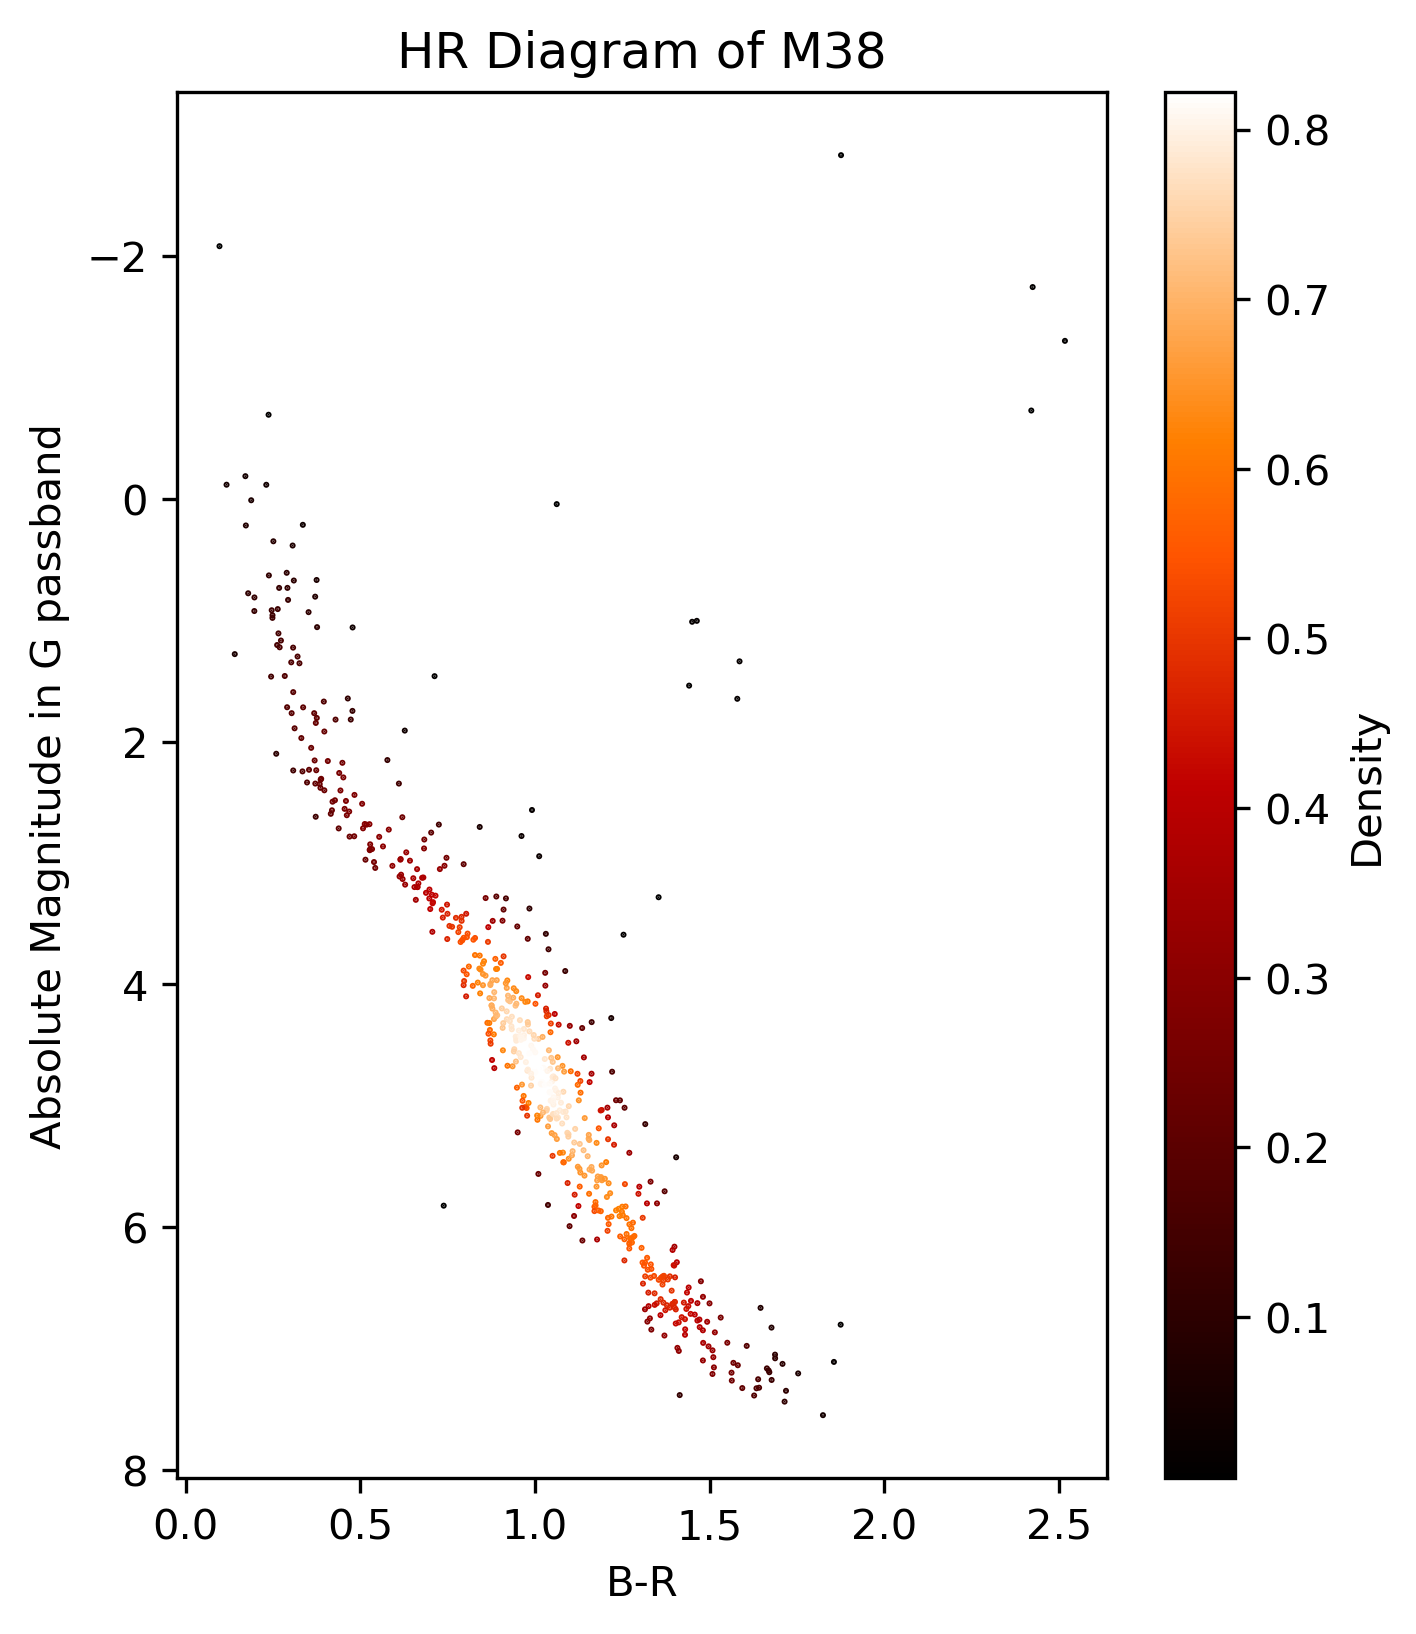

In [30]:
distm38_2 = 1000/rm38_2['parallax']
M38 = rm38_2['phot_g_mean_mag'] - 5*np.log10(distm38_2) + 5
bprp38 = rm38_2['phot_bp_mean_mag'] - rm38_2['phot_rp_mean_mag']
M38=np.array([M38[x] for x in range(len(M38)) if bprp38[x]!=np.nan])
bprp38 = np.array([x for x in bprp38 if x!=np.nan])
m6bprp38 = np.vstack((bprp38, M38))
zm38 = gaussian_kde(m6bprp38)(m6bprp38)
plt.figure(figsize=(5,6), dpi=300)
plt.title('HR Diagram of M38')
plt.xlabel('B-R')
plt.ylabel('Absolute Magnitude in G passband')
plt.scatter(bprp38, M38, s=0.2, c=zm38, cmap='gist_heat')
plt.colorbar(label='Density')
plt.gca().invert_yaxis()
plt.show()